In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 직전 컴럼까지 데이터
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 

In [5]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체생성
reg.fit(X, y) # 학습(모델생성)

LinearRegression()

In [7]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

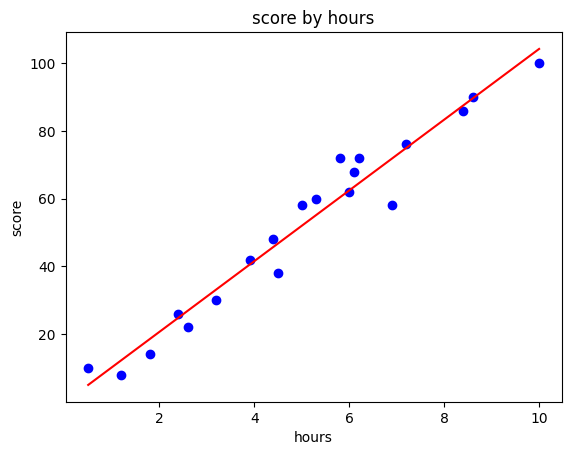

In [8]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
print('9시간 공부했을떄의 점수 : ', reg.predict([[9]]))

9시간 공부했을떄의 점수 :  [93.77478776]


In [10]:
reg.coef_

array([10.44369694])

In [11]:
reg.intercept_

np.float64(-0.218484702867201)

In [12]:
y_cal = 10.44369694 * 9 - 0.218484702867201
print(y_cal)

93.7747877571328


데이터세트분리

In [13]:
import matplotlib.pyplot as plt 
import pandas as pd

In [14]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [15]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train, len(X_train), X_test, len(X_test)

(    hour
 10   5.3
 17   8.4
 6    3.9
 13   6.1
 4    2.6
 2    1.8
 5    3.2
 14   6.2
 9    5.0
 7    4.4
 16   7.2
 11   5.8
 3    2.4
 0    0.5
 15   6.9
 12   6.0,
 16,
     hour
 18   8.6
 1    1.2
 19  10.0
 8    4.5,
 4)

In [18]:
y_train, len(y_train)

(10    60
 17    86
 6     42
 13    68
 4     22
 2     14
 5     30
 14    72
 9     58
 7     48
 16    76
 11    72
 3     26
 0     10
 15    58
 12    62
 Name: score, dtype: int64,
 16)

In [19]:
y_test, len(y_test)

(18     90
 1       8
 19    100
 8      38
 Name: score, dtype: int64,
 4)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
reg.fit(X_train, y_train)

LinearRegression()

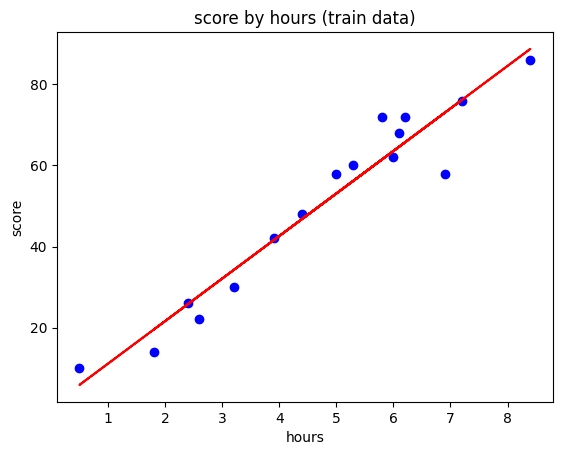

In [22]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'red')
plt.title('score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

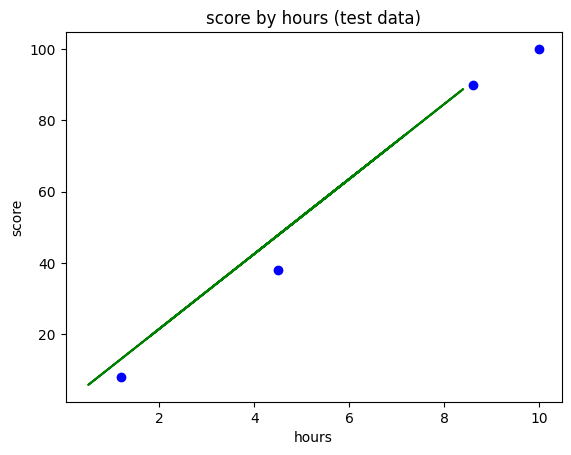

In [23]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green')
#plt.plot(X_test, reg.predict(X_test), color = 'red')
plt.title('score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

모델평가

In [24]:
reg.score(X_test, y_test)

0.9727616474310156

In [25]:
reg.score(X_train, y_train)

0.9356663661221668

경사하강법
max_iter : 훈련셋트반복횟수
eta0 : 학습률
1e-3 = 0.001
1e_3 = 1000

In [26]:
from sklearn.linear_model import SGDRegressor
#sr = SGDRegressor()
sr = SGDRegressor(max_iter = 300, eta0=1e-4, random_state=0, verbose = 1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

C:\Users\ldhsp\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=300, random_state=0, verbose=1)

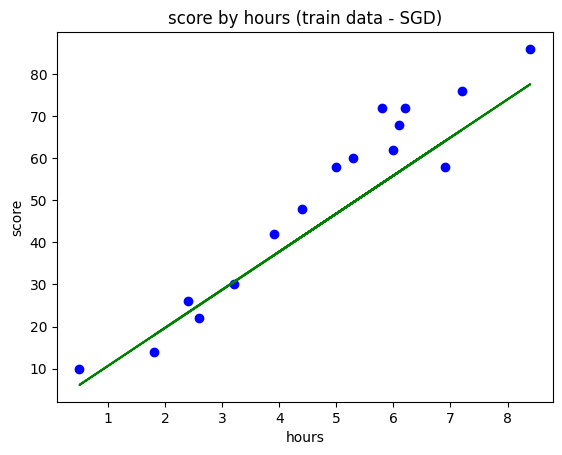

In [27]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'green')
#plt.plot(X_test, reg.predict(X_test), color = 'red')
plt.title('score by hours (train data - SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
sr.coef_, sr.intercept_

(array([9.05069563]), array([1.59210372]))

In [29]:
sr.score(X_train, y_train)

0.8528075925731422

In [30]:
sr.score(X_test, y_test)

0.9625821079434302